## Bivariate Analysis

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk

# Diabetes 🍒🍓🍉

1. Age (Usia): Usia pasien dalam tahun.
2. Gender (Jenis Kelamin): Jenis kelamin pasien (Pria/Wanita).
3. Polyuria: Frekuensi buang air kecil yang berlebihan (Ya/Tidak).
4. Polydipsia: Rasa haus yang berlebihan (Ya/Tidak).
5. Sudden weight loss (Penurunan berat badan mendadak): Penurunan berat badan yang tiba-tiba tanpa sebab jelas (Ya/Tidak).
6. Weakness (Kelemahan): Perasaan lemah atau lelah yang tidak biasa (Ya/Tidak).
7. Polyphagia: Nafsu makan yang meningkat secara berlebihan (Ya/Tidak).
8. Genital thrush (Infeksi jamur genital): Adanya infeksi jamur pada area genital (Ya/Tidak).
9. Visual blurring (Penglihatan kabur): Gangguan penglihatan seperti penglihatan kabur (Ya/Tidak).
10. Itching (Gatal-gatal): Rasa gatal pada kulit tanpa sebab yang jelas (Ya/Tidak).
11. Irritability (Iritabilitas): Perasaan mudah marah atau tersinggung (Ya/Tidak).
12. Delayed healing (Penyembuhan luka lambat): Luka yang membutuhkan waktu lebih lama untuk sembuh (Ya/Tidak).
13. Partial paresis (Paresis parsial): Kelemahan otot sebagian atau kelumpuhan ringan (Ya/Tidak).
14. Muscle stiffness (Kekakuan otot): Kekakuan atau ketegangan pada otot (Ya/Tidak).
15. Alopecia: Kehilangan rambut atau kebotakan (Ya/Tidak).
16. Obesity (Obesitas): Kondisi kelebihan berat badan atau obesitas (Ya/Tidak).
17. Class: Klasifikasi apakah pasien menderita diabetes atau tidak (Positif/Negatif).

In [43]:
df = pd.read_csv('dataset\diabetes_data_upload.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Acer\AppData\Local\Temp\ipykernel_7452\520094320.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('dataset\diabetes_data_upload.csv')


In [44]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [45]:
df.shape 

(520, 17)

there are 520 instances and 17 features with one of them is the target

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

mostly are object with age is the only interger col

In [47]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [48]:
total_age = df['Age'].nunique()
print(f' nunique age: {total_age}')

 nunique age: 51


In [49]:
df['Age'].mode()

0    35
Name: Age, dtype: int64

In [50]:
object_desc = df.describe(include='object').T
object_desc['unique'] = [df[col].unique() for col in df.select_dtypes(include="object").columns]
object_desc

,count,unique,top,freq
Gender,520,"[Male, Female]",Male,328
Polyuria,520,"[No, Yes]",No,262
Polydipsia,520,"[Yes, No]",No,287
sudden weight loss,520,"[No, Yes]",No,303
weakness,520,"[Yes, No]",Yes,305
Polyphagia,520,"[No, Yes]",No,283
Genital thrush,520,"[No, Yes]",No,404
visual blurring,520,"[No, Yes]",No,287
Itching,520,"[Yes, No]",No,267
Irritability,520,"[No, Yes]",No,394


age 35 has the most freq data in the dataset

## **Data Inconsistencies**

In [51]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [52]:
df.duplicated().sum()

np.int64(269)

great no missing vals, but there are 269 row that are duplicated

In [53]:
df[df.duplicated(keep=False)]


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
17,67,Male,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Positive
18,66,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,No,Positive
19,43,Male,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,Positive
20,62,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,Positive
21,54,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


around 376 is the total, including the first value, we're going to delete the 269 because it won't give us meaning ful insight, one representative is enough

In [54]:
df_clean = df.copy()
df_clean.drop_duplicates(inplace=True)

In [55]:
df_clean

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [73]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['figure.titlesize'] = 32

- Hypoteses 1: Polyuria is from frequent, have higher potesin to diabetes
- Hypotesis 2: if someone Obesity, is have characteristic to obesity
- Hypotesis 3: Older people have more potential have diabetes

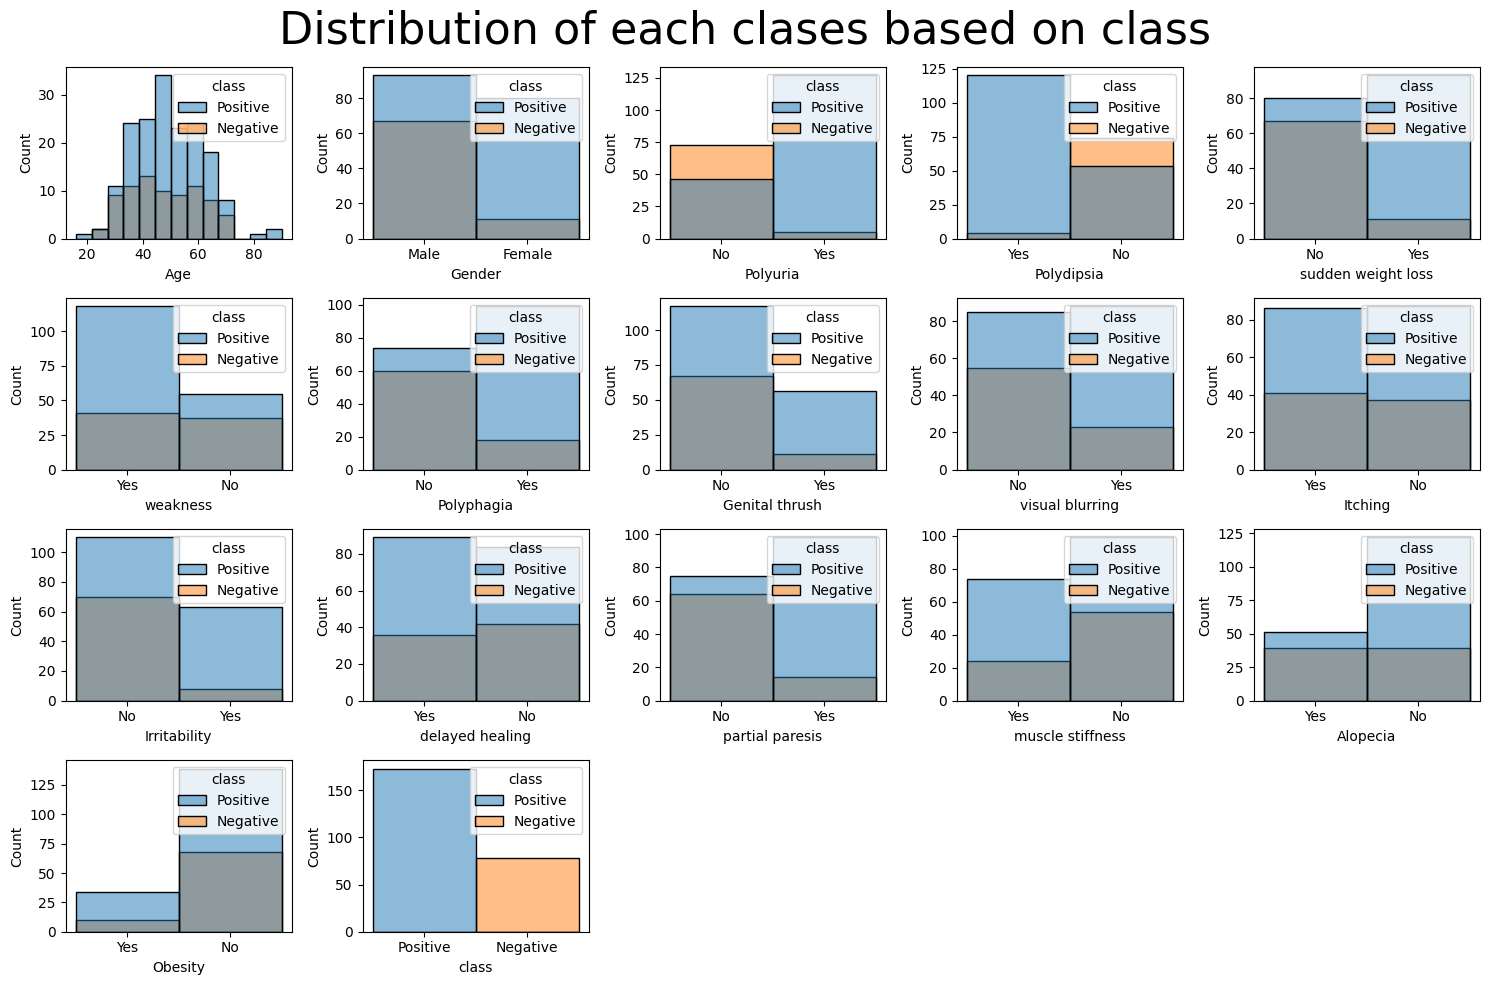

In [76]:
for i, col in enumerate(df_clean):
    plt.subplot(4, 5, i+1)
    sns.histplot(x=df_clean[col], hue=df_clean['class'])

plt.suptitle("Distribution of each clases based on class")
plt.tight_layout()
plt.show()

- Age have good distribution, while gender 
- Because this dataset of diabetes, di class positive is quite more big than negative
- 

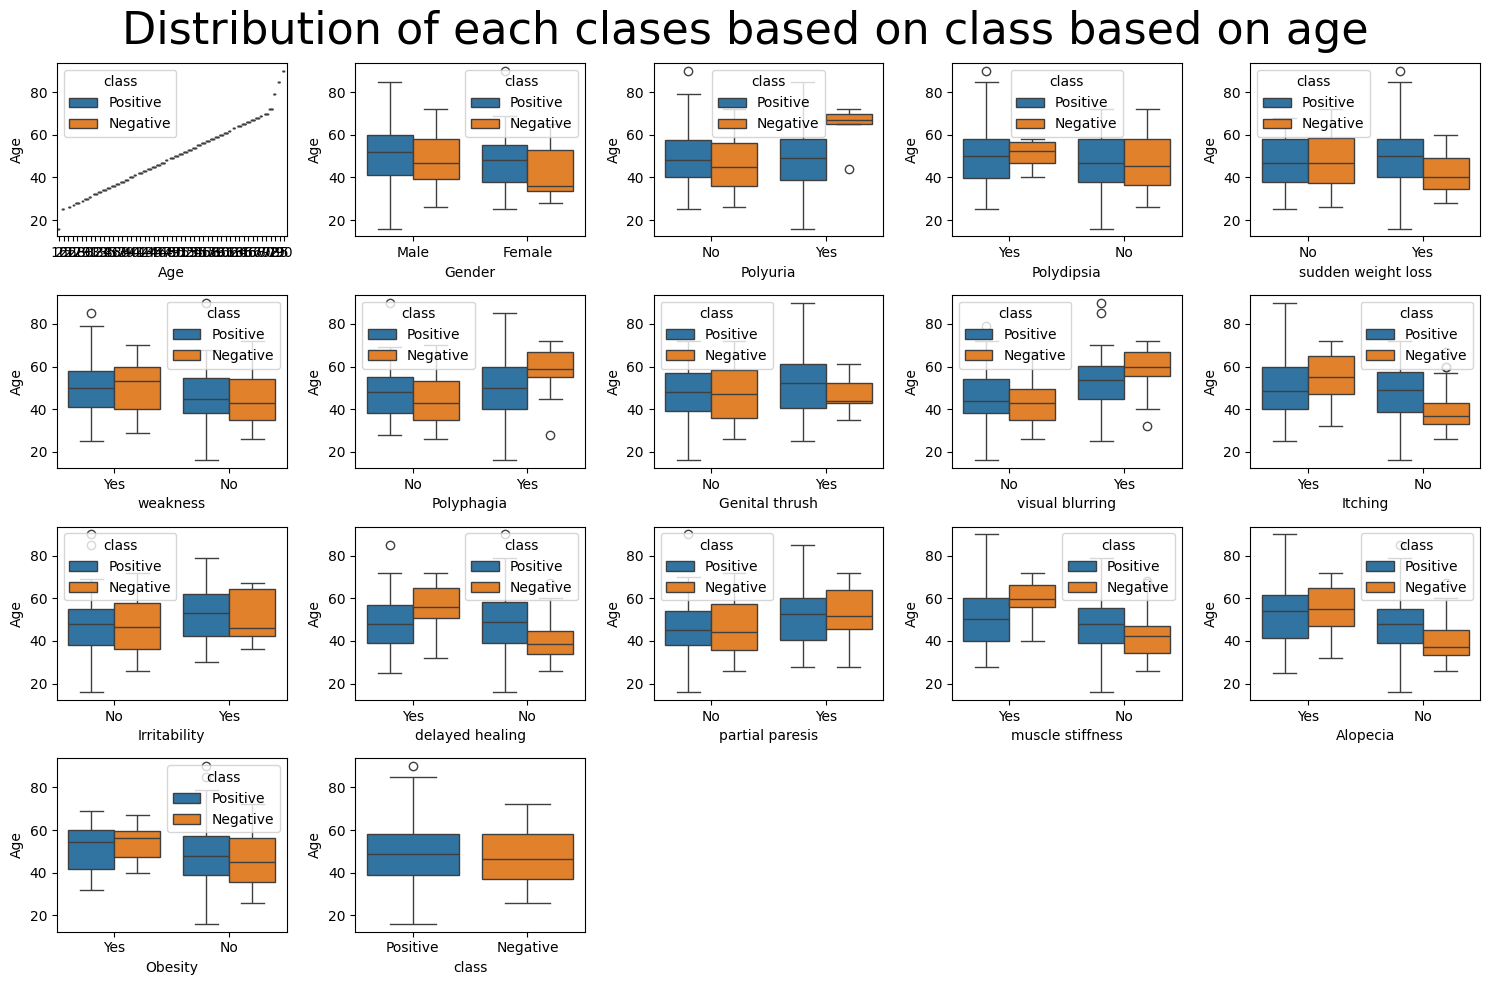

In [93]:
for i, col in enumerate(df_clean):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=df_clean[col], y=df_clean['Age'], hue=df_clean['class'])

plt.suptitle("Distribution of each clases based on class based on age")
plt.tight_layout()
plt.show()

## Intersting characteristic 
- `Class` to `age` have sligtly equel `positive` or `negative`, but Positive class have more range and with outliers for higher age
- `Muscle stifness` have a similar tren with `ithcing` and `alopecia`, `delayed` `healing`,
- while `Polyphagia`, `visual blurring`, `polyuria` have dierse with perivous, that `Negative` Yes is more higher


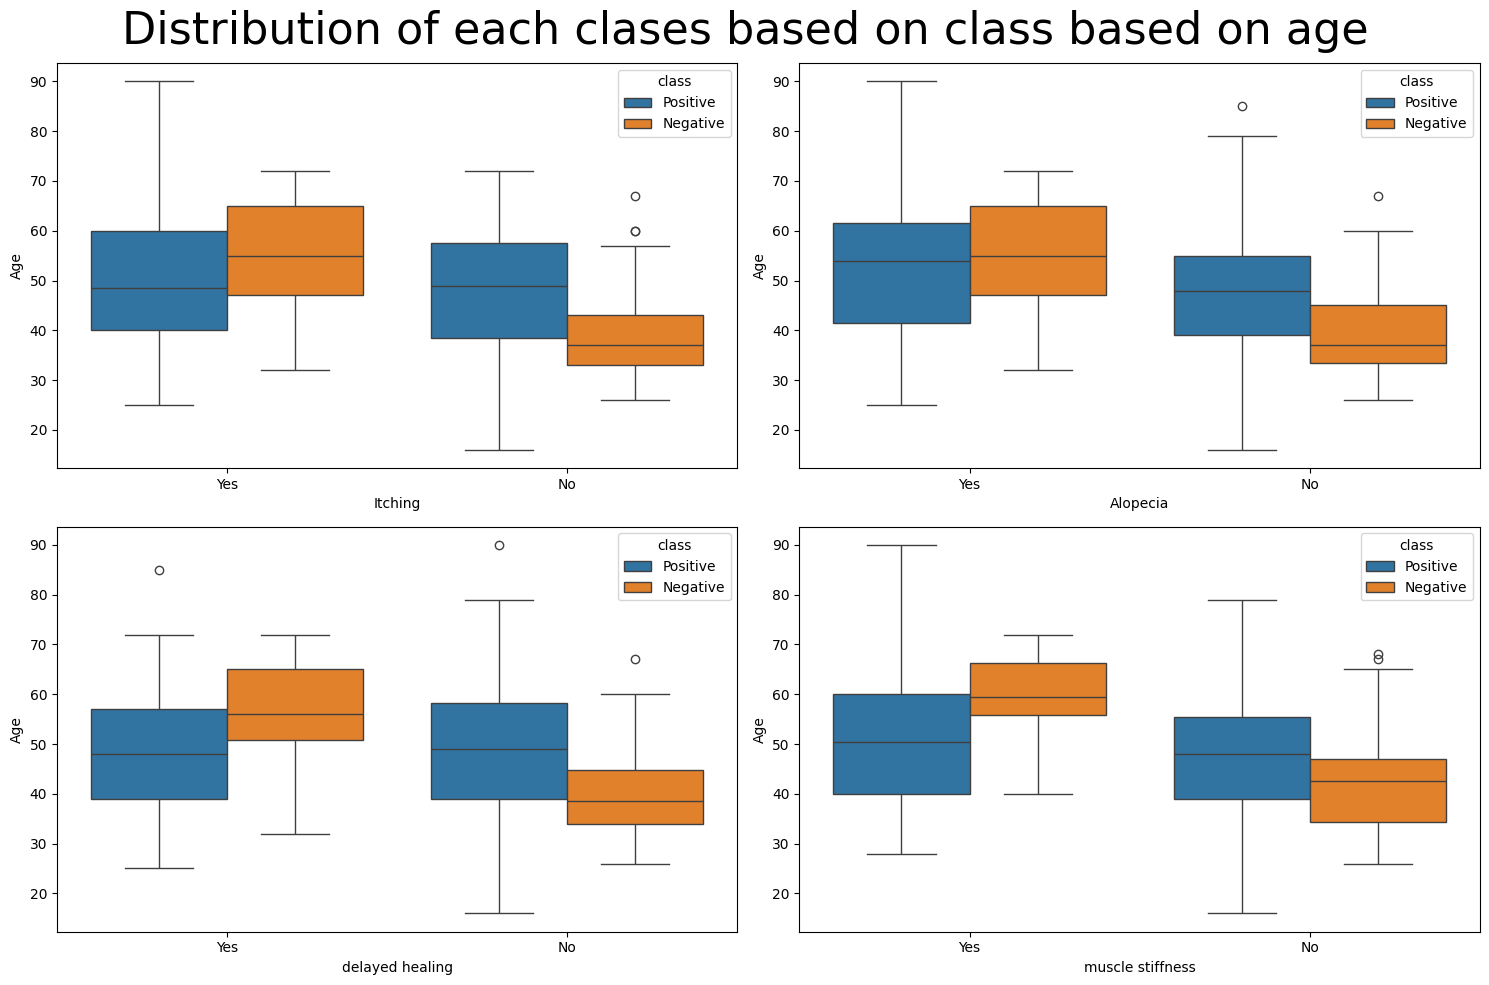

In [98]:
for i, col in enumerate(df_clean[['Itching', 'Alopecia', 'delayed healing', 'muscle stiffness']]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_clean[col], y=df_clean['Age'], hue=df_clean['class'])

plt.suptitle("Distribution of each clases based on class based on age")
plt.tight_layout()
plt.show()

## Interpratation
- Age with lower No complication is dont have diabetes, it mean the more young people with no complication is more safe from diabetes, while pople with diabetes range of productive people

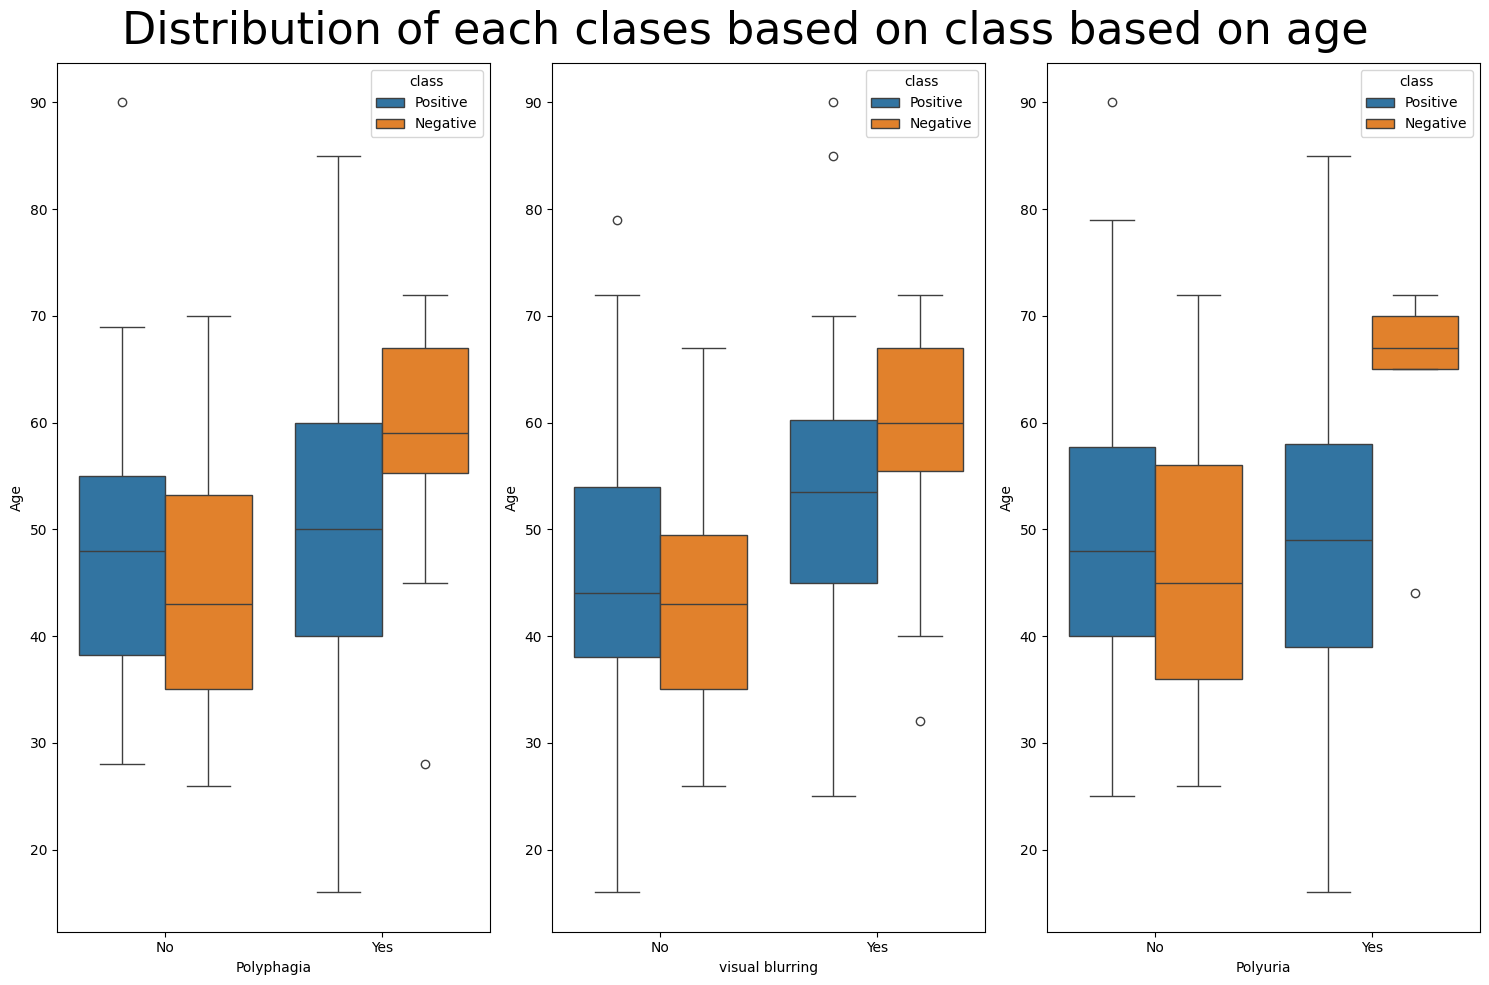

In [100]:
for i, col in enumerate(df_clean[['Polyphagia', 'visual blurring', 'Polyuria']]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_clean[col], y=df_clean['Age'], hue=df_clean['class'])

plt.suptitle("Distribution of each clases based on class based on age")
plt.tight_layout()
plt.show()

## Interpratation 
- while `Polyphagia`, `visual blurring`, `polyuria` have dierse with perivous, that `Negative` Yes is more higher
It means:

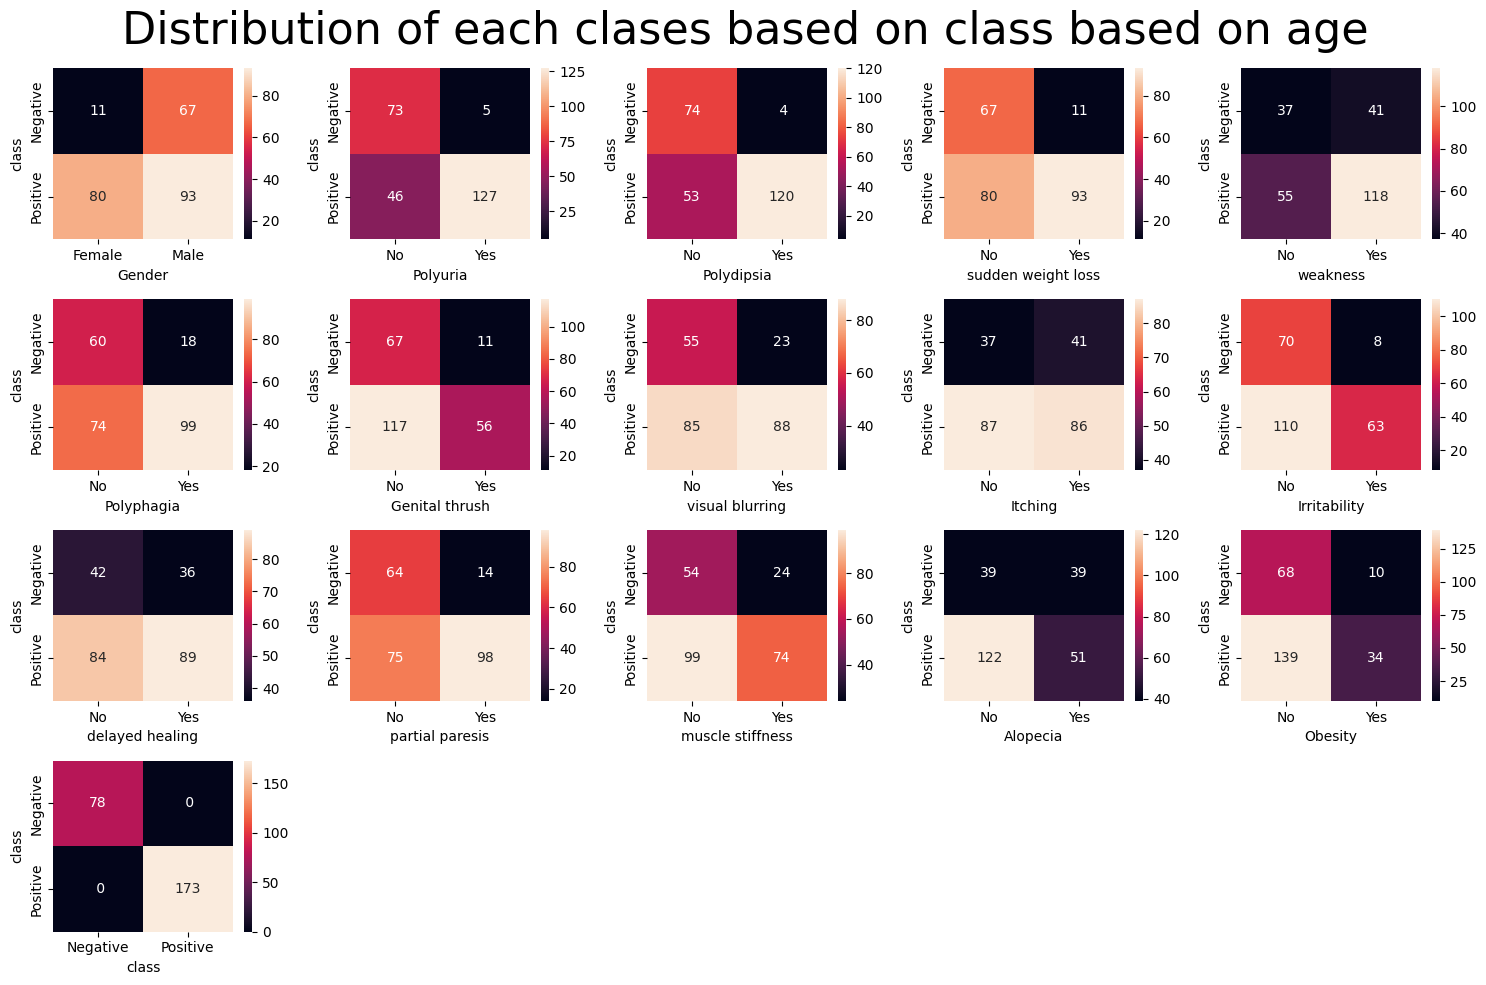

In [103]:

for i, col in enumerate(df_clean.select_dtypes(include='object')):
    plt.subplot(4, 5, i+1)
    sns.heatmap(pd.crosstab(df_clean['class'], df_clean[col],), annot=True, fmt='2')

plt.suptitle("Distribution of each clases based on class based on age")
plt.tight_layout()
plt.show()


Tree Visualization: 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, deque
from matplotlib.patches import Patch, ConnectionPatch

class TreeVisualization:
    def __init__(self, tree, data_df, target_col, feature_names):
        self.tree = tree
        self.data_df = data_df
        self.target_col = target_col
        self.feature_names = feature_names
        self.mode = tree.mode
        self.palette = self._create_color_palette()
        self.node_cache = {}
        self._cache_nodes(tree.root)
        
    def _create_color_palette(self):
        classes = np.unique(self.data_df[self.target_col])
        return dict(zip(classes, sns.color_palette("Set2", n_colors=len(classes))))
    
    def _calculate_impurity(self, y):
        return self._calculate_gini(y) if self.mode == 'gini' else self._calculate_entropy(y)
    
    def _calculate_entropy(self, y):
        total = len(y)
        return -sum((c/total)*np.log2(c/total) for c in Counter(y).values())
        
    def _calculate_gini(self, y):
        total = len(y)
        return 1 - sum((c/total)**2 for c in Counter(y).values())
    
    def _cache_nodes(self, root):
        queue = deque([root])
        while queue:
            node = queue.popleft()
            self.node_cache[id(node)] = node
            if getattr(node, 'left', None):
                queue.extend([node.left, node.right])
    
    def get_prediction_path(self, x):
        path, decisions = [], []
        node = self.tree.root
        while node.value is None:
            path.append(node)
            feature_val = x[node.feature_index]
            val_str = f"{feature_val:.2f}" if isinstance(feature_val, (int, float)) else str(feature_val)
            thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
            op = "≤" if feature_val <= node.threshold else ">"
            decisions.append(f"Step {len(path)}: {self.feature_names[node.feature_index]} = {val_str} {op} {thresh_str}")
            node = node.left if feature_val <= node.threshold else node.right
        path.append(node)
        decisions.append(f"Final: Class {node.value}")
        return path, decisions
    
    def plot_prediction_path(self, x=None, step=None, fig=None, ax=None):
        fig = fig or plt.figure(figsize=(8,8))
        ax = ax or fig.add_subplot(111)
        ax.clear(); ax.set_axis_off()
    
        node_width, node_height, level_height = 0.15, 0.1, 0.2
        node_boxes, path_ids = {}, {}
    
        def get_node_positions(node, level=0, x_pos=0.5):
            pos = {id(node):(x_pos, 1 - level*level_height)}
            if getattr(node, 'left', None):
                spacing = 0.25/(level+1)
                pos.update(get_node_positions(node.left, level+1, x_pos-spacing))
                pos.update(get_node_positions(node.right, level+1, x_pos+spacing))
            return pos
    
        node_positions = get_node_positions(self.tree.root)
        if x is not None:
            prediction_path, decisions = self.get_prediction_path(x)
            if step is not None:
                prediction_path = prediction_path[:step]
            path_ids = {id(n) for n in prediction_path}
    
        for node_id, (x_pos, y) in node_positions.items():
            node = self.node_cache[node_id]
            node_boxes[node_id] = [x_pos - node_width/2, y - node_height/2, node_width, node_height]
            node_ax = fig.add_axes([x_pos - node_width/2, y - node_height/2, node_width, node_height])
            if node.value is not None:
                self._draw_leaf_node(node_ax, node, node_id in path_ids)
            else:
                self._draw_decision_node(node_ax, node, node_id in path_ids)
    
        self._draw_connections(node_positions, node_boxes, path_ids, ax)
    
        legend_elements = [
            Patch(facecolor=self.palette[cls], alpha=0.3, label=cls)
            for cls in sorted(self.data_df[self.target_col].unique())
        ]
        ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1.2), title="Classes")
    
        if x is not None:
            title = (f"Decision Tree Path - Step {step} of {len(decisions)}"
                     if step is not None else f"Complete Decision Path\nFinal Prediction: Class {self.tree.predict([x])[0]}")
        else:
            title = f"Complete Decision Tree Visualization\nImpurity Measure: {self.mode.capitalize()}"
        fig.suptitle(title, fontsize=12)
        return fig, ax
    
    def _draw_leaf_node(self, ax, node, is_active):
        ax.axis('off')
        edge_color, lw = ('red', 2) if is_active else ('black', 1)
        dist = Counter(node.sample)
        txt = f"Class {node.value}\n" + "\n".join(f"Class {k}: {v}" for k, v in dist.items())
        txt += f"\n{'Gini' if self.mode=='gini' else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}"
        bg_color = self.palette[max(dist, key=dist.get)]
        ax.text(0.5, 0.5, txt, ha='center', va='center',
                bbox=dict(boxstyle="round", fc=(*bg_color, 0.3), ec=edge_color, linewidth=lw),
                fontsize=8)
    
    def _draw_decision_node(self, ax, node, is_active):
        edge_color, lw = ('red', 2) if is_active else ('black', 1)
        sns.histplot(data=self.data_df, x=self.feature_names[node.feature_index],
                     hue=self.target_col, palette=self.palette, multiple="stack", ax=ax)
        ax.set(xlabel='', ylabel='')
        ax.axvline(node.threshold, color=edge_color, linestyle='--', linewidth=lw)
        if ax.get_legend(): ax.get_legend().remove()
        dist = Counter(node.sample)
        thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
        title = (f"{self.feature_names[node.feature_index]} <= {thresh_str}\n" +
                 " ".join(f"{k}:{v}" for k, v in dist.items()) +
                 f"\n{'Gini' if self.mode=='gini' else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}")
        ax.set_title(title, fontsize=8, color=edge_color)
    
    def _draw_connections(self, positions, boxes, path_ids, main_ax):
        for node_id, _ in positions.items():
            node = self.node_cache[node_id]
            if getattr(node, 'left', None):
                for child in [node.left, node.right]:
                    is_active = node_id in path_ids and id(child) in path_ids
                    self._draw_connection(node, child, boxes, is_active, main_ax)
    
    def _draw_connection(self, parent, child, boxes, is_active, main_ax):
        color, width = ('red', 2) if is_active else ('black', 1)
        p_box, c_box = boxes[id(parent)], boxes[id(child)]
        con = ConnectionPatch(xyA=(p_box[0] + p_box[2]/2, p_box[1]),
                              xyB=(c_box[0] + c_box[2]/2, c_box[1] + c_box[3]),
                              coordsA="figure fraction", coordsB="figure fraction",
                              axesA=main_ax, axesB=main_ax,
                              arrowstyle="->", color=color, linewidth=width)
        main_ax.add_artist(con)


In [104]:
df_clean.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
def accuracy_score(y_pred, y_test):
    return np.mean(y_pred == y_test) * 100

def cross_validation(X, y, model, k=5, prune=False, alpha=0.0):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_size = n_samples // k
    accuracies = []

    for i in range(k):
        test_start = i * fold_size
        test_end = test_start + fold_size if i < k -1 else n_samples
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train , y_test = y[train_indices], y[test_indices]

        model.fit(X_train, y_train.reshape(-1, 1))

        if prune =='REP':
            model.reduced_error_pruning(X_test, y_test, model.root)
        elif prune == 'CCP':
            model.cost_complexity_pruning(alpha, model.root)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_pred, y_test)
        accuracies.append(accuracy)

    data = {
        'X_train': X_train, 'y_train': y_train, 'X_test': X_test, 'y_test': y_test,
        'y_pred': y_pred, 'accuracies': accuracies
    }

    return data


In [ ]:
target_col = 'class'
feature_names = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

X = df_clean[feature_names].values
Y = df_clean[target_col].values

model = DecisionTreeClassifier(X, Y, max_depth),

data = cross_validation(X, Y, model, k=5, prune=False, alpha=0)

data_df = pd.DataFrame(data['X_train'], columns=feature_names)
data_df[target_col] = data['y_train'].flatten()

viz = TreeVisualization(model,data_df=data_df, target_col=target_col, feature_names=feature_names)  
viz.plot_prediction_path()


In [106]:
df_clean.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

## End product (Grpahical user Interface)

In [114]:
from tkinter.ttk import *
from tkinter import messagebox
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os

AttributeError: 'TkinterApp' object has no attribute 'selected_feature'

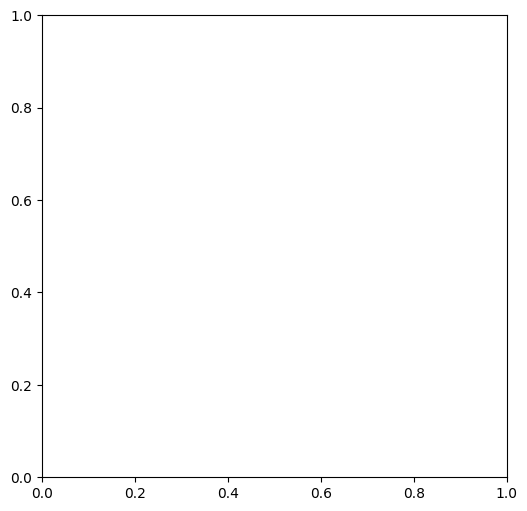

: 

In [ ]:
class TkinterApp:
    def __init__(self, root):
        self.root = root
        self.root.attributes('-fullscreen', True)
        self.root.title("Diabetes Prevent App")
        self.columns = ['patient_name', 'predict', 'ratio' 'Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring','Itching', 'Irritability', 'delayed healing', 'partial paresis','muscle stiffness', 'Alopecia', 'Obesity', 'max_depth', 'min_sample_split',  'min_sample_leaf', 'selected_features', 'mode','post_pruning' 'alpha_value']
        self.history_file = 'history.pkl'
        self.history = self.load_history()

        Style().configure('TNotebook.Tab', font=('Poppins', 34), padidng="30 10 30 10")
        self.fig, self.ax = plt.subplots(figsize=(6,6))

        self.tab_control = Notebook(root)
        self.predict_tab = Frame(self.tab_control, padding="30")
        self.history_tab = Frame(self.tab_control, padding="30")
        self.setting_tab = Frame(self.tab_control, padding="30")

        self.all_features = ['Polyuria', 'Polydipsia','sudden weight loss' ,'Age', 'Gender', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring','Itching', 'Irritability', 'delayed healing', 'partial paresis','muscle stiffness', 'Alopecia', 'Obesity']
        self.selected_features = self.all_features[:3]

        self.init_string_var()
        self.tab_control.add(self.predict_tab, text="Predict" )
        self.tab_control.add(self.history_tab, text="History" )
        self.tab_control.add(self.setting_tab, text="Settings" )
        self.tab_control.pack(anchor='w', fill='x')

        self.train_model()
        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()

    def init_string_var(self):
        self.max_depth_var = tk.StringVar(value="4")
        self.min_sample_split_var = tk.StringVar(value="6")
        self.min_sample_leaf_var = tk.StringVar(value="4")
        self.mode_var = tk.StringVar(value="4")
        self.alpha_value_var = tk.StringVar(value="0.0")
        self.post_pruning_var = tk.StringVar(value="REP")

        self.features_var = tk.StringVar(value=", ".join(self.selected_features))
    
    def input_label(self, parent,label,values=None,row=None, col=None, textvariable=None, desc_text=None, ):
        Label(parent, text=label, font=('Poppins', 16)).grid(row=row, column=col, sticky='w')
        if type == "entry":
            widget = Entry(parent,font=('Poppins', 15), textvariable=textvariable, width=30)
        elif type == "combobox":
            widget = Combobox(parent,font=('Poppins', 15), textvariable=textvariable, value=values, width=30)
        else:
            widget = Checkbutton(parent, textvariable=textvariable, width=30 )
        
        widget.grid(row=row+1,col=col, sticky='w')
        if desc_text:
            Label(parent, text=desc_text, font=('Poppins italic', 8)).grid(row=row+2, column=col, sticky='w')
    
    def init_predict_tab(self):
        Label(self.predict_tab, text="Prevent Diabetes App with Decision Tree", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
        Label(self.predict_tab, text="Check the patient based on input", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')

        self.frame_input = Frame(self.predict_tab)
        self.frame_input.grid(row=2, column=1)

        self.features_entries = {}
        self.create_input_fields()

    def create_input_fields(self):
        for widget in self.frame_input.winfo_children():
            widget.destroy()

        self.patient_name_entry = self.input_label(self.frame_input, label="Patient Name", col=0, row=0, desc_text="Enter name for easy find")

        col = 0
        row = 1
        max_row = row
        for feature in self.selected_features:
            self.features_entries[feature] =  self.input_label(self.frame_input, label=feature.replace("_"," ").title(), col=col, row=row, desc_text=f"choose {feature}")
            col += 1
            if col == 4:
                row += 3
                col=0
                max_row = row

        Button(self.frame_input, text="Go Predict", command=self.predict_and_plot, padding="30 10 30 10").grid(col=0, row=max_row+3, sticky='w')
        
        self.frame_result = Frame(self.predict_tab)
        self.frame_result.grid(row=3, column=1)

    def predict_and_plot(self):
        try:
            values = []
            for feature in self.selected_features:
                mapping = {
                    True: 1,
                    False:0,
                }
                value = mapping[feature][self.features_entries[feature].get()]
                values.append(value)


            full_feature_array = np.zeros(len(self.all_features))
            for i, value in enumerate(self.all_features):
                if value in self.selected_features:
                    idx = self.selected_features.index(value)
                    full_feature_array[i] = values[idx]

            self.new_instance = full_feature_array
            path, decisions = self.viz.get_prediction_path(self.self.new_instance, step=self.step.get(), fig=self.fig, ax=self.ax)
            max_step = len(decisions)


            if getattr(self, 'frame_viz'):
                self.frame_viz = Frame(self.predict_tab)
                self.frame_viz.grid(row=2, column=0)

                self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
                self.canvas.get_tk_widget().grid(row=2, column=0)
            else:
                for widget in self.frame_viz.winfo_children():
                    if self.canvas.get_tk_widget() == widget:
                        widget.destroy()
            
            self.step = tk.Scale(self.frame_viz, from_=0, to=max_step, orient='horizontal', length=400, resolution=1, tickinterval=1)
            self.step.grid(row=0,column=0)

            self.fig.clf()
            self.ax = self.fig.add_subplot(111)
            viz.plot_prediction_path(ax=self.ax, fig=self.fig)
            self.canvas.draw()

            for widget in self.frame_result.winfo_children():
                widget.destroy()
            
            predict = self.model.make_prediction()
            ratio = self.model.get_leaf_node()

            for i, value in enumerate(self.all_features):
                if value in self.selected_features:
                    new_row[value] = full_feature_array[i]

            new_row = {
                'client_name' :[self.client_name_entry.get()],
                'predict' :[predict],
                'ratio' :[ratio],
                'max_depth' :[self.max_depth_var.get()],
                'min_sample_split' :[self.min_sample_split_var.get()],
                'min_sample_leaf' :[self.min_sample_leaf_var.get()],
                'selected_features' :[self.selected_features.get()],
                'mode' :[self.mode_var.get()],
                'alpha_value' :[self.alpha_value_var.get()],
            }


            Label(self.frame_result, text="Prediction Result: ", font=('Poppins medium', 15)).grid(row=0, column=0, sticky='w')

            col = 0
            row = 1
            for column, value in new_row.items():
                if column in self.frame_input or column in [ 'patient_name', 'predict', 'ratio', 'max_depth', 'min_sample_split',  'min_sample_leaf', 'selected_features', 'mode', 'alpha_value']:
                    column_name = column.replace("_", " ").capitalize()
                    Label(self.frame_result, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
                    Label(self.frame_result, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
                col += 1
                if col == 4:
                    row += 2
                    col=0

            self.input_frame = Frame(self.predict_tab)
            self.input_frame.grid(row=3, column=2)

            self.history = pd.concat([self.history, pd.DataFrame(new_row)], ignore_index=True)
            self.update_history()
            self.save_to_pickle()

        except Exception as e:
            messagebox.showerror("Error Predict and Plot", f"Error: {e}")

    def update_plot(self):
        self.fig.clf()
        self.ax = self.fig.add_subplot(111)
        viz.plot_prediction_path(self.new_instance, step=self.step.get(), ax=self.ax, fig=self.fig)
        self.canvas.draw()

    
    def init_history_tab(self):
        Label(self.predict_tab, text="See lastest Prediction", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
        Label(self.predict_tab, text="compare the result and perfomance", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')

        self.history_tree = Treeview(self.history_tab, columns=['patient_name', 'predict'], show='headings')
        self.history_tree.heading('patient_name',text="Patient Name" )
        self.history_tree.heading('predict',text="Is Diabetes" )
        self.history_tree.grid(column=0, row=2)

        Button(self.frame_input, text="Go Predict", command=self.predict_and_plot, padding="30 10 30 10").grid(col=0, row=3, sticky='w')

        self.compare_frame1 = Frame(self.predict_tab)
        self.compare_frame1.grid(row=4, column=0)

        self.compare_frame2 = Frame(self.predict_tab)
        self.compare_frame2.grid(row=4, column=1)

    def compare_history(self):
        selected_item = self.history_tree.selection()

        if len(selected_item) != 2:
            messagebox.showerror("Error Selection", "Please select exact 2 for comparasion")

        item1 = self.history.iloc[len(selected_item[0])]
        item2 = self.history.iloc[len(selected_item[1])]

        for widget in self.compare_frame1.winfo_children():
            widget.destroy()
        for widget in self.compare_frame2.winfo_children():
            widget.destroy()
        
        col = 0
        row = 1
        for column, value in item1.items():
            if column in self.frame_input or column in ['patient_name', 'predict', 'ratio', 'max_depth', 'min_sample_split',  'min_sample_leaf', 'selected_features', 'mode', 'alpha_value']:
                column_name = column.replace("_", " ").capitalize()
                Label(self.compare_frame1, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
                Label(self.compare_frame1, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
            col += 1
            if col == 4:
                row += 2
                col=0

        col = 0
        row = 1
        for column, value in item2.items():
            if column in self.frame_input or column in ['patient_name', 'predict', 'ratio', 'max_depth', 'min_sample_split',  'min_sample_leaf', 'selected_features', 'mode', 'alpha_value']:
                column_name = column.replace("_", " ").capitalize()
                Label(self.compare_frame2, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
                Label(self.compare_frame2, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
            col += 1
            if col == 4:
                row += 2
                col=0

    def init_setting_tab(self):
        Label(self.setting_tab, text="Adjust and Make Best Performance", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
        Label(self.setting_tab, text="By default, setting was in best performance", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')
        
        input_frame = Frame(self.setting_tab)
        input_frame.grid(row=2, column=0)

        self.max_depth_entry = self.input_label(input_frame, label="Max Depth Entry", textvariable=self.max_depth_var.get(), row=0, col=0)
        self.min_sample_split_entry = self.input_label(input_frame, label="Min Sample Split",textvariable=self.min_sample_split_var.get(), row=0, col=1)
        self.min_sample_leaf_entry = self.input_label(input_frame, label="Min Sample Leaf",textvariable=self.min_sample_leaf_var.get(), row=0, col=2)

        self.alpha_value_entry = self.input_label(input_frame,textvariable=self.alpha_value_var.get(), label="Alpha Value", row=3, col=0)
        self.mode_entry = self.input_label(input_frame, textvariable=self.mode_var.get(), values=['gini', 'entropy'], label="Mode Impurity", row=3, col=1)
        self.post_pruning_entry = self.input_label(input_frame, label="Post Pruning",values=['CCP', 'REP', False], row=3, col=2)
        
        listbox_frame = Frame(self.setting_tab)
        listbox_frame.grid(row=4, column=1)
        
        Label(listbox_frame, text="Feature Selection", font=('Poppins', 15)).grid(row=0, column=0, sticky='w')
        self.listbox_feature = tk.Listbox(listbox_frame,self.all_features,selectmode='multiple', width=20, height=len(self.all_features))
        self.listbox_feature.grid(row=1, column=0, sticky='w')

        for i, feature in enumerate(self.all_features):
            if feature in self.selected_features:
                pass

        Label(listbox_frame, text="Current Selection:", font=('Poppins medium', 10)).grid(row=2, column=0, sticky='w')
        Label(listbox_frame, text=self.features_var.get(), font=('Poppins', 8)).grid(row=3, column=0, sticky='w')

        Button(listbox_frame, text="Train and update feature", command=self.update_model_and_feature, padding="30 10 30 10").grid(col=0, row=3, sticky='w')

    def update_model_and_feature(self):
        selection_indices = self.listbox_feature.curselection()

        if selection_indices:
            messagebox.showerror("Error Selection", "Please select exact 2 for comparasion")

        self.selected_features = [self.all_features[i] for i in selection_indices]
        self.features_var.set(', '.join(self.selected_features))
        
        self.create_input_fields()
        self.train_model()

    def train_model(self):
        # try:

        messagebox.showinfo('Info', 'Train model processing')            
        
        self.frame_viz = Frame(self.predict_tab)
        self.frame_viz.grid(row=3, column=0)

        self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
        self.canvas.get_tk_widget().grid(row=2, column=0)
        for widget in self.frame_viz.winfo_children():
            if self.canvas.get_tk_widget() == widget:
                widget.destroy()
        
        feature_indices = [self.all_features.index(feature) for feature in self.selected_features]

        X_selected = df_clean[self.selected_feature].values
        Y = df_clean['class'].values

        self.model = DecisionTreeClassifier(X_selected, Y, max_depth=int(self.max_depth_var.get()), min_sample_split=int(self.min_sample_split_var.get()), min_sample_leaf=int(self.min_sample_leaf_var.get()), features=feature_indices, mode=self.mode_var.get())
        
        data = cross_validation(X_selected, Y, self.model, k=5, prune=self.post_pruning_var.get(), alpha=float(self.alpha_value_var.get()))

        data_df = pd.DataFrame(data['X_train'], columns=self.selected_features)
        data_df['class'] = data['y_train'].flatten()

        self.viz = TreeVisualization(self.model, data_df, target_col='class', feature_names=self.selected_features)
        self.viz.plot_prediction_path(fig=self.fig, ax=self.ax)
        self.ax = self.fig.add_subplot(111)
        self.canvas.draw()


        clf_report_frame = Frame(self.predict_tab)
        clf_report_frame.grid(row=5, column=0)

        for widget in clf_report_frame.winfo_children():
            widget.destroy()

        Label(clf_report_frame, text="Classification Report", font=('Poppins', 15)).grid(row=0, column=0, sticky='w')
        clf_report = classification_report(data['y_pred'], data['y_train'])
        
        col= 0
        row = 1
        for column, value in clf_report.items():
            column_name = column.replace("_", " ").capitalize()
            Label(clf_report_frame, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
            Label(clf_report_frame, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
            col += 1
            if col == 5:
                row += 2
                col= 0

        messagebox.showinfo('Success', 'Model has successsfully updated')      

    def load_history(self):
        if os.path.exists(self.history_file):
            self.history.to_pickle(self.history_file)
        else:
            new_row = pd.DataFrame(columns=self.columns)
            return new_row
        
    def save_to_pickle(self):
        self.history.to_pickle(self.history_file)

    def update_history(self):
        for item in self.history_tree.get_children():
            self.history_tree.delete(item)
        for i, row in enumerate(self.history):
            value = tuple(row[col] for col in self.columns)
            self.history_tree.insert('', 'end', values=value)
if __name__ == "__main__":
    root = tk.Tk()
    app = TkinterApp(root)
    root.mainloop()